In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [4]:
df = pd.read_csv("../data/data.csv", skiprows=1)

with open("../data/data.csv", "r") as f:
    params = dict([(param, float(val)) for (param, val) in [pair.split('=') for pair in f.readline().split(',')]])
l = params["l"]

In [19]:
def plot_cart(z, l, fac=0.25, alpha=1):
    plt.gca().add_patch(patches.Rectangle((z - fac*l, 0), 0.5*l, fac*l, alpha=alpha))
    
def plot_pole(z, theta, l, alpha, bar=True):
    if bar:
        plt.plot([z, z + 0.93*l*np.sin(theta)], [0.1*l, 0.25*l - 0.93*l*np.cos(theta)], "r")
        plt.gca().add_patch(patches.Circle((z, 0.1*l), 0.025*l, color="r", alpha=alpha))
    plt.gca().add_patch(patches.Circle((z + l*np.sin(theta), 0.25*l - l*np.cos(theta)), 0.05*l, color="g", alpha=alpha))

In [32]:
def plot_static(grp):
    data = df[df["group"] == grp]
    plt.figure(figsize=(10,3))
    plt.plot([-5, 5], [0, 0], "k")
    plot_cart(0, l)
    plot_pole(0, np.pi, l, 1)
    plot_cart(data.iloc[0, 1], l)
    plot_pole(data.iloc[0, 1], 0, l, 1)
    for i in range(len(data)):
        plot_pole(data.iloc[i, 1], data.iloc[i, 2], l, (i/len(data))**3, bar=False)
    plt.gca().set_aspect("equal")
    plt.xlim(-1, 1)
    plt.ylim(-l,1.5*l)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("../figures/static/trajectory_{:03d}.png".format(grp), dpi=500)

/Users/maitreya/miniconda3/envs/data1030/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


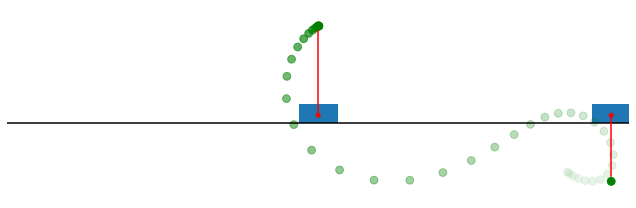

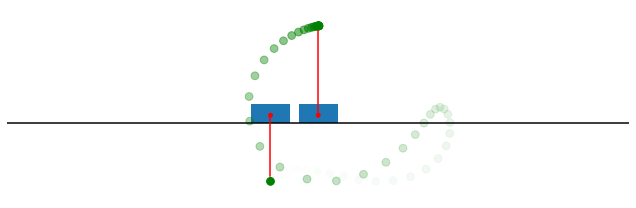

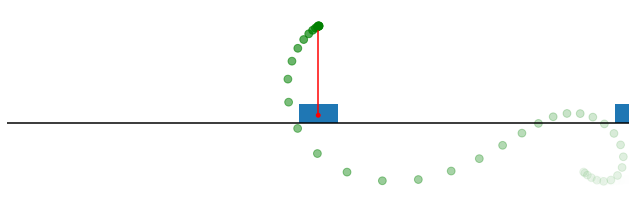

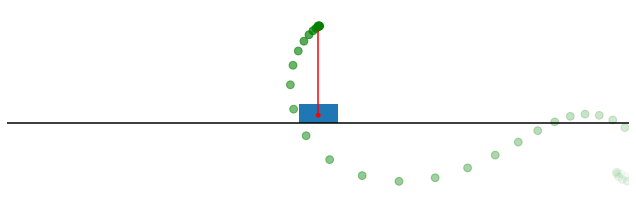

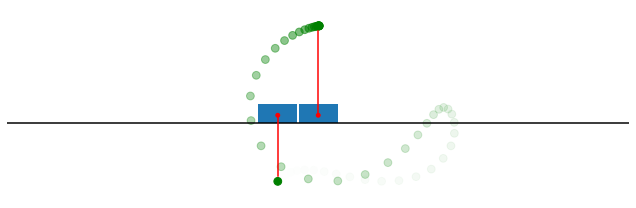

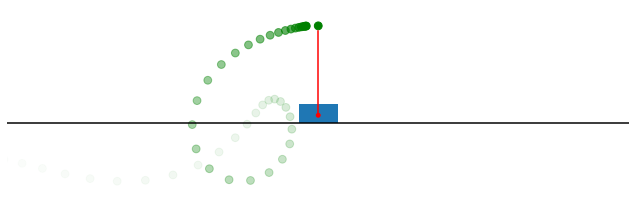

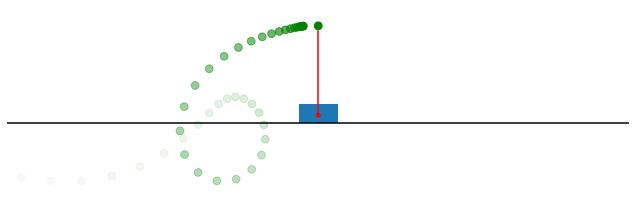

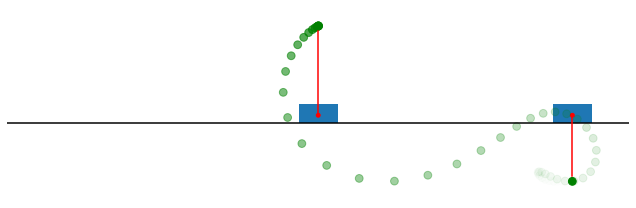

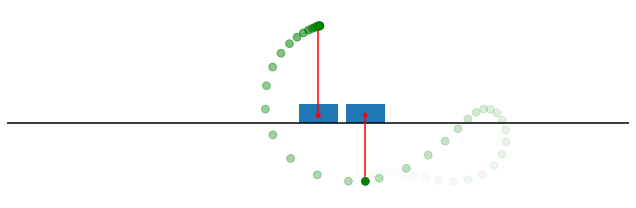

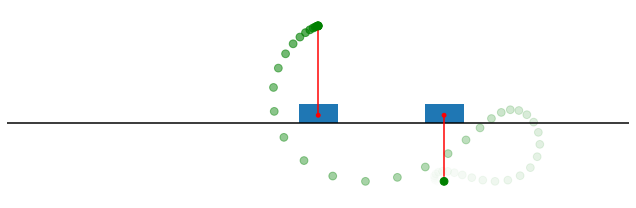

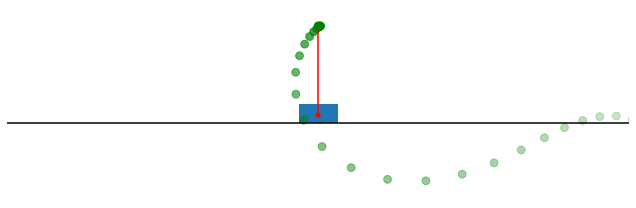

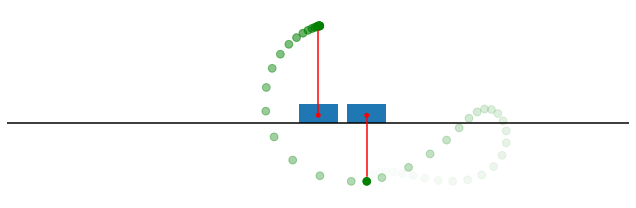

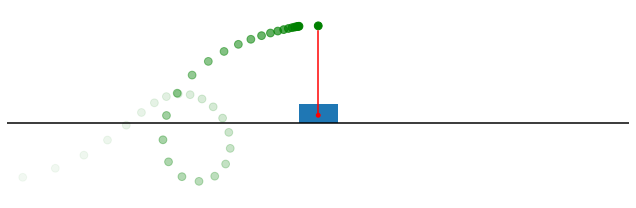

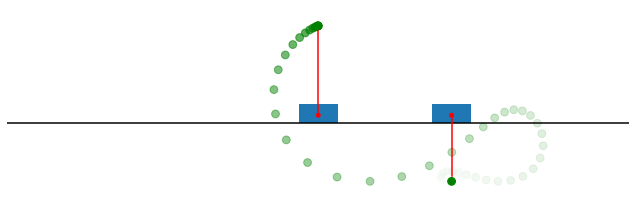

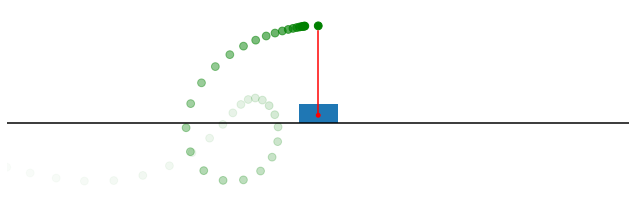

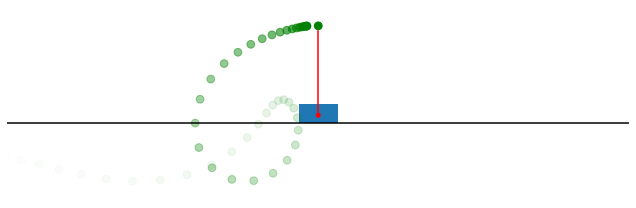

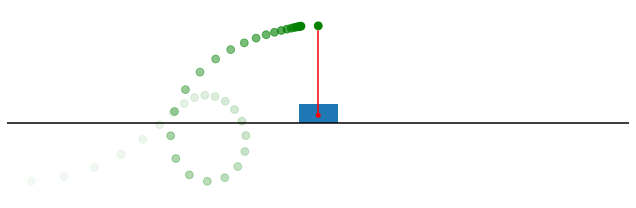

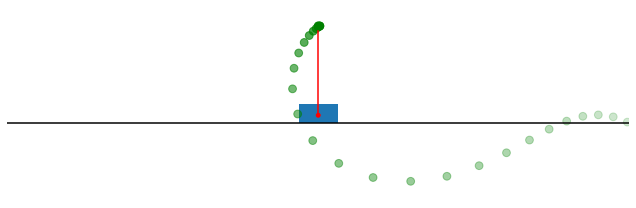

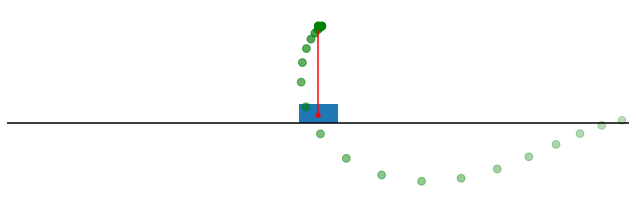

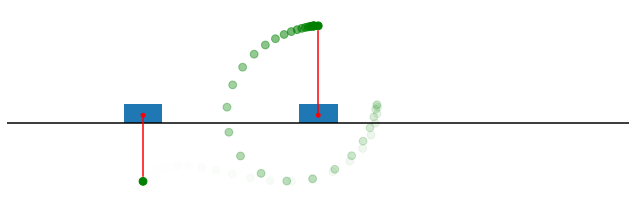

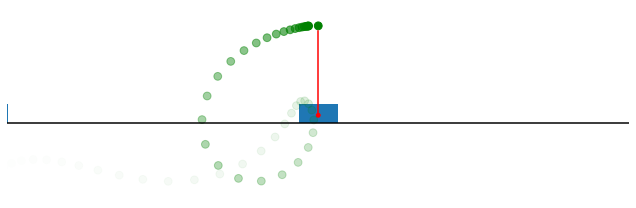

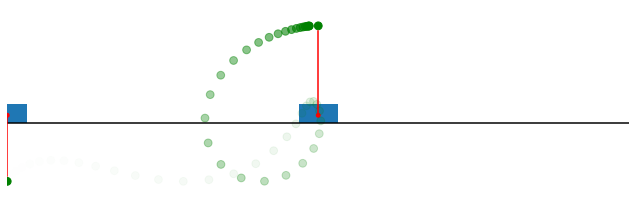

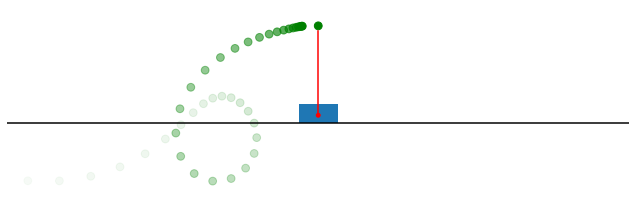

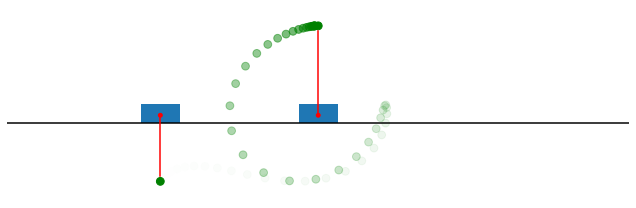

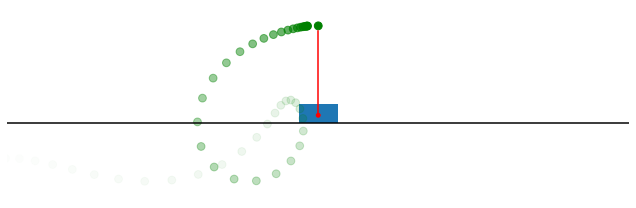

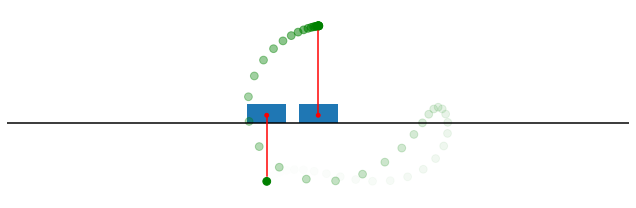

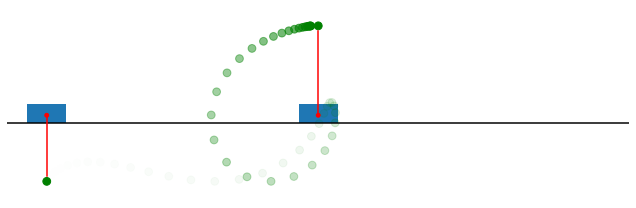

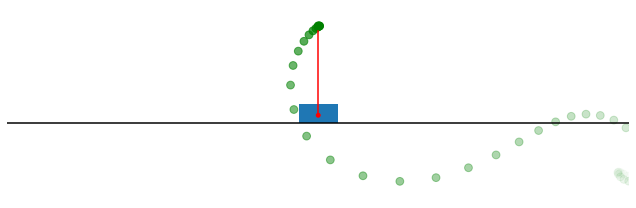

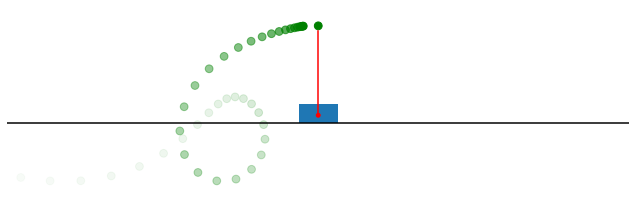

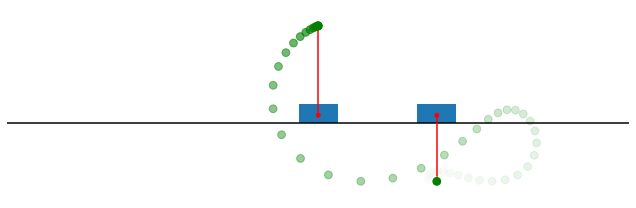

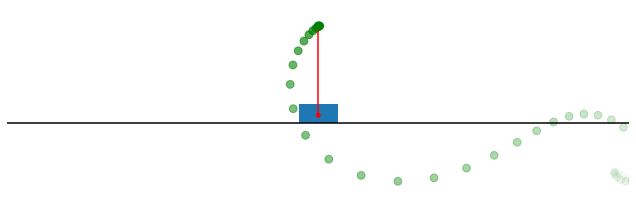

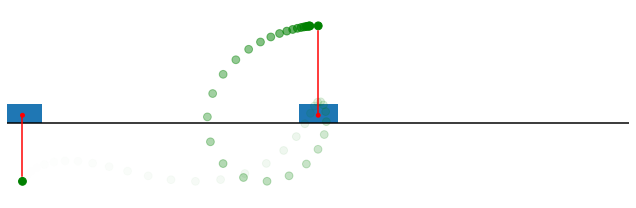

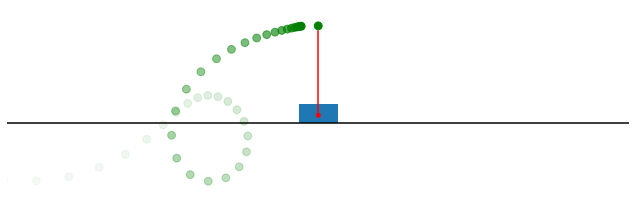

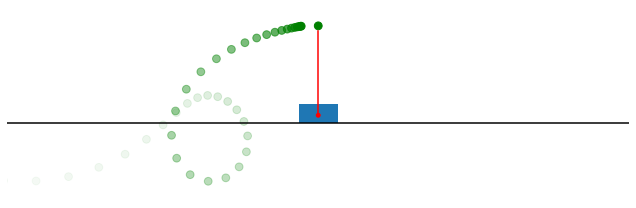

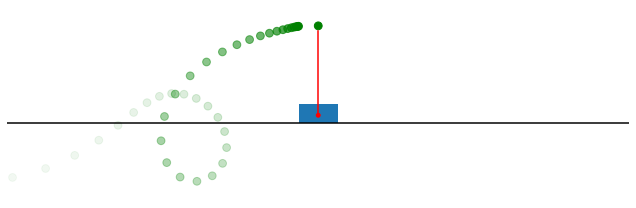

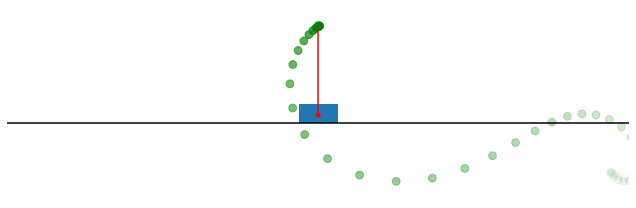

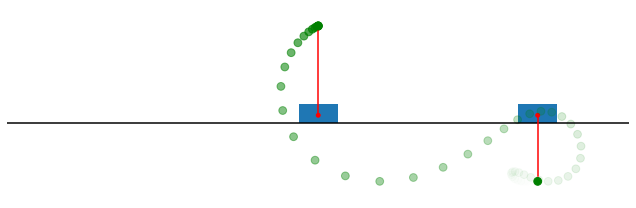

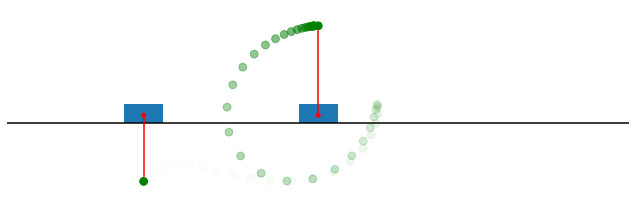

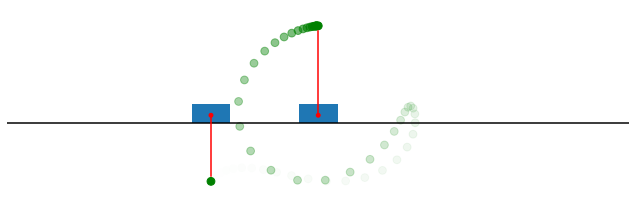

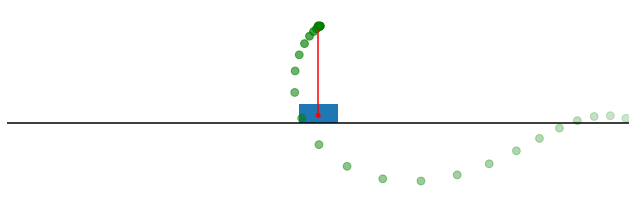

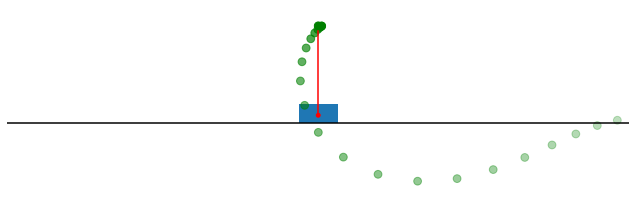

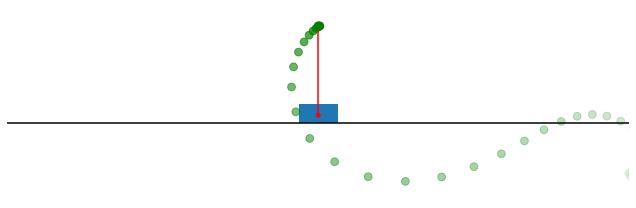

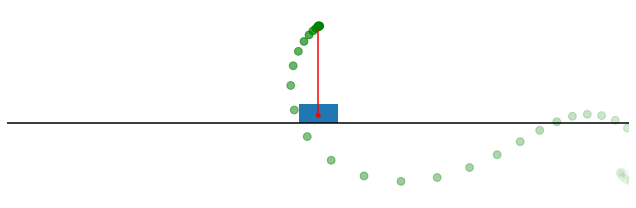

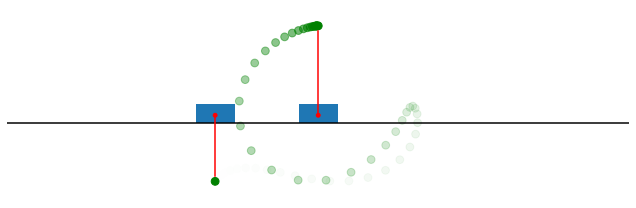

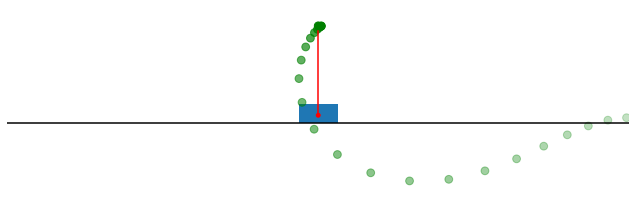

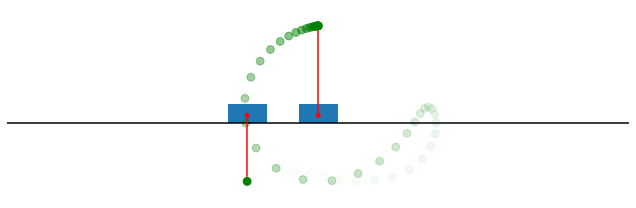

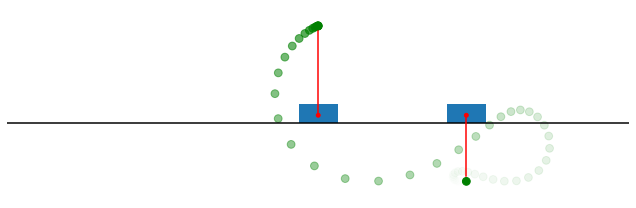

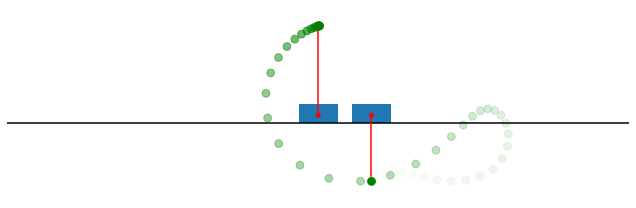

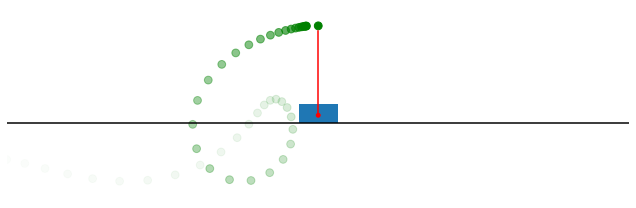

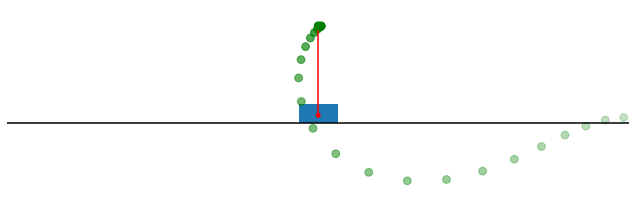

In [33]:
for i in range(50):
    plot_static(i)

In [157]:
def plot_video(data):
    for frame in range(len(data)):
        plt.figure(figsize=(10,3))
        plt.plot([-5, 5], [0, 0], "k")
        plot_cart(data.iloc[frame, 1], l)
        plot_pole(data.iloc[frame, 1], data.iloc[frame, 2], l, 1)
        plt.gca().set_aspect("equal")
        plt.xlim(-1, 1)
        plt.ylim(-l,1.5*l)
        plt.axis("off")
        plt.tight_layout()
        plt.savefig("../video/frame{:03d}.png".format(frame))
        plt.close();

In [160]:
data = df[df["group"] == 2]

for i in range(1):
    data.index = range(1, 2*len(data)+1, 2)
    data = data.reindex(index=range(2*len(data)))
    data = data.interpolate(method="quadratic").iloc[1:,:]

plot_video(data)

In [161]:
! convert -delay 2 -loop 0 ../video/*.png ../video/cart.gif

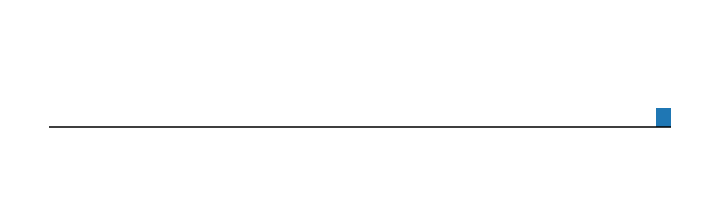

In [162]:
from IPython.display import Image
with open('../video/cart.gif','rb') as file:
    display(Image(file.read()))